In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy.special import erfinv, comb
from scipy.stats import uniform, binom, norm
from dataclasses import dataclass
from sklearn.metrics import accuracy_score

import utils

In [2]:
def uniform_generator(a, b, num_samples=100):
    """
    Generates an array of uniformly distributed random numbers within the specified range.

    Parameters:
    - a (float): The lower bound of the range.
    - b (float): The upper bound of the range.
    - num_samples (int): The number of samples to generate (default: 100).

    Returns:
    - array (ndarray): An array of random numbers sampled uniformly from the range [a, b).
    """

    np.random.seed(42)

    array = np.random.uniform(a, b, num_samples)

    return array

In [3]:
print(
    f"6 randomly generated values between 0 and 1:\n{np.array2string(uniform_generator(0, 1, num_samples=6), precision=3)}\n"
)
print(
    f"3 randomly generated values between 20 and 55:\n{np.array2string(uniform_generator(20, 55, num_samples=3), precision=3)}\n"
)
print(
    f"1 randomly generated value between 0 and 100:\n{np.array2string(uniform_generator(0, 100, num_samples=1), precision=3)}"
)

6 randomly generated values between 0 and 1:
[0.375 0.951 0.732 0.599 0.156 0.156]

3 randomly generated values between 20 and 55:
[33.109 53.275 45.62 ]

1 randomly generated value between 0 and 100:
[37.454]


In [4]:
def inverse_cdf_gaussian(y, mu, sigma):
    """
    Calculates the inverse cumulative distribution function (CDF) of a Gaussian distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - mu (float): The mean of the Gaussian distribution.
    - sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the Gaussian distribution that correspond to the given probability/ies.
    """
    x = sigma * np.sqrt(2) * erfinv(2 * y - 1) + mu

    return x

In [5]:
# Test your function

print(
    f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1e-10}: {inverse_cdf_gaussian(1e-10, 15, 5):.3f}"
)
print(
    f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {0}: {inverse_cdf_gaussian(0, 15, 5)}"
)
print(
    f"Inverse of Gaussian CDF with mu {20} and sigma {0.5} for value {0.4}: {inverse_cdf_gaussian(0.4, 20, 0.5):.3f}"
)
print(
    f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1}: {inverse_cdf_gaussian(1, 15, 5)}"
)

Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf
Inverse of Gaussian CDF with mu 20 and sigma 0.5 for value 0.4: 19.873
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf


In [6]:
def gaussian_generator(mu, sigma, num_samples):
    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = np.random.normal(0, 1, num_samples)

    # Use the uniform-distributed sample to generate Gaussian-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = u * sigma + mu

    return array

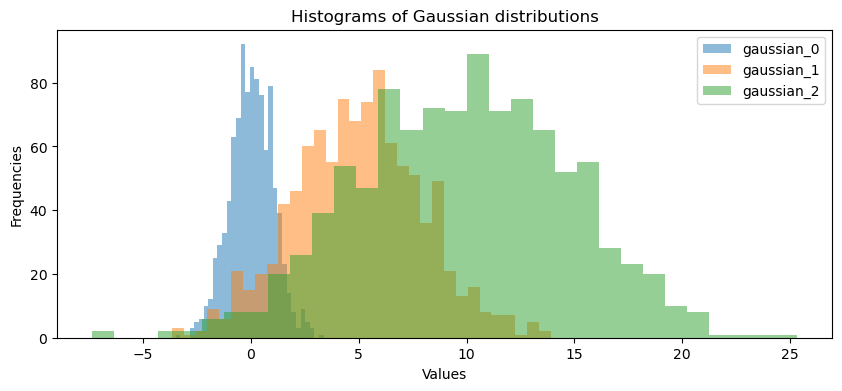

In [7]:
# Test your function

gaussian_0 = gaussian_generator(0, 1, 1000)
gaussian_1 = gaussian_generator(5, 3, 1000)
gaussian_2 = gaussian_generator(10, 5, 1000)

utils.plot_gaussian_distributions(gaussian_0, gaussian_1, gaussian_2)

In [8]:
def inverse_cdf_binomial(y, n, p):
    """
    Calculates the inverse cumulative distribution function (CDF) of a binomial distribution.

    Parameters:
    - y (float or ndarray): The probability or array of probabilities.
    - n (int): The number of trials in the binomial distribution.
    - p (float): The probability of success in each trial.

    Returns:
    - x (float or ndarray): The corresponding value(s) from the binomial distribution that correspond to the given probability/ies.
    """

    x = binom.ppf(y, n, p)

    return x

In [9]:
# Test your function

print(
    f"Inverse of Binomial CDF with n {15} and p {0.9} for value {1e-10}: {inverse_cdf_binomial(1e-10, 15, 0.9):.3f}"
)
print(
    f"Inverse of Binomial CDF with n {15} and p {0.5} for value {0}: {inverse_cdf_binomial(0, 15, 0.5)}"
)
print(
    f"Inverse of Binomial CDF with n {20} and p {0.2} for value {0.4}: {inverse_cdf_binomial(0.4, 20, 0.2):.3f}"
)
print(
    f"Inverse of Binomial CDF with n {15} and p {0.5} for value {1}: {inverse_cdf_binomial(1, 15, 0.5)}"
)

Inverse of Binomial CDF with n 15 and p 0.9 for value 1e-10: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 0: -1.0
Inverse of Binomial CDF with n 20 and p 0.2 for value 0.4: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 1: 15.0


In [10]:
def binomial_generator(n, p, num_samples):
    """
    Generates an array of binomially distributed random numbers.

    Args:
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success in each trial.
        num_samples (int): The number of samples to generate.

    Returns:
        array: An array of binomially distributed random numbers.
    """

    # Generate an array with num_samples elements that distribute uniformally between 0 and 1
    u = np.random.uniform(0, 1, num_samples)

    # Use the uniform-distributed sample to generate binomial-distributed data
    # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
    array = inverse_cdf_binomial(u, n, p)

    return array

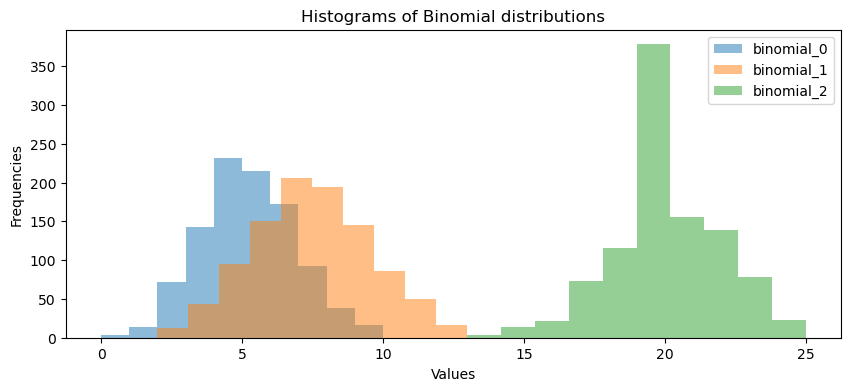

In [11]:
# Test your function

binomial_0 = binomial_generator(12, 0.4, 1000)
binomial_1 = binomial_generator(15, 0.5, 1000)
binomial_2 = binomial_generator(25, 0.8, 1000)

utils.plot_binomial_distributions(binomial_0, binomial_1, binomial_2)

In [12]:
FEATURES = ["height", "weight", "bark_days", "ear_head_ratio"]

In [13]:
# Read the pre-loaded dataset
pre_loaded_df = pd.read_pickle("df_all_breeds.pkl")

try:
    # Generate the dataset using the graded functions from section 1
    df_all_breeds = utils.generate_data(
        gaussian_generator, binomial_generator, uniform_generator
    )
except:
    # In case of an error
    print(
        "There was an error when generating the dataset using the generator functions.\n\nFalling back to the pre-loaded one."
    )
    df_all_breeds = pre_loaded_df
else:
    # In case that the generated dataset does not match the pre-loaded one
    if not df_all_breeds.equals(pre_loaded_df):
        print(
            "The dataset generated from the generator functions is not identical to the expect one.\n\nFalling back to the pre-loaded one."
        )
        df_all_breeds = pre_loaded_df


# Print the first 10 rows of the dataframe
df_all_breeds.head(10)

The dataset generated from the generator functions is not identical to the expect one.

Falling back to the pre-loaded one.


,height,weight,bark_days,ear_head_ratio,breed
2836,39.697810,31.740980,9.0,0.193120,2
1002,36.710641,21.140427,26.0,0.163527,0
1075,34.726930,19.817954,24.0,0.386113,0
1583,32.324884,30.812210,18.0,0.463242,1
248,37.691499,21.794333,28.0,0.118190,0
814,36.688852,21.125901,26.0,0.165052,0
1407,30.844078,27.110196,16.0,0.399051,1
3376,38.616784,30.814387,8.0,0.169269,2
2700,44.655532,35.990456,12.0,0.281653,2
533,35.209095,20.139397,24.0,0.322284,0


In [14]:
# Define a 70/30 training/testing split
split = int(len(df_all_breeds) * 0.7)

# Do the split
df_train = df_all_breeds[:split].reset_index(drop=True)
df_test = df_all_breeds[split:].reset_index(drop=True)

In [15]:
def pdf_uniform(x, a, b):
    """
    Calculates the probability density function (PDF) for a uniform distribution between 'a' and 'b' at a given point 'x'.

    Args:
        x (float): The value at which the PDF is evaluated.
        a (float): The lower bound of the uniform distribution.
        b (float): The upper bound of the uniform distribution.

    Returns:
        float: The PDF value at the given point 'x'. Returns 0 if 'x' is outside the range [a, b].
    """
    
    pdf = 1 / (b - a)

    if x > b or x < a:
        pdf = 0

    return pdf

In [16]:
# Test your function

print(
    f"Uniform PDF with a={0} and b={5} for value {1e-10}: {pdf_uniform(1e-10, 0, 5):.3f}"
)
print(f"Uniform PDF with a={20} and b={25} for value {5}: {pdf_uniform(5, 20, 25):.3f}")
print(
    f"Uniform PDF with a={2} and b={10} for value {5.4}: {pdf_uniform(5.4, 2, 10):.3f}"
)
print(
    f"Uniform PDF with a={35} and b={60} for value {42}: {pdf_uniform(42, 35, 60):.3f}"
)

Uniform PDF with a=0 and b=5 for value 1e-10: 0.200
Uniform PDF with a=20 and b=25 for value 5: 0.000
Uniform PDF with a=2 and b=10 for value 5.4: 0.125
Uniform PDF with a=35 and b=60 for value 42: 0.040


In [17]:
def pdf_gaussian(x, mu, sigma):
    """
    Calculate the probability density function (PDF) of a Gaussian distribution at a given value.

    Args:
        x (float or array-like): The value(s) at which to evaluate the PDF.
        mu (float): The mean of the Gaussian distribution.
        sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
        float or ndarray: The PDF value(s) at the given point(s) x.
    """

    pdf = np.exp(-1 * (((x - mu) / sigma) ** 2) / 2) / (sigma * np.sqrt(2 * np.pi))

    return pdf

In [18]:
# Test your function

print(
    f"Gaussian PDF with mu={15} and sigma={5} for value {10}: {pdf_gaussian(10, 15, 5):.3f}"
)
print(
    f"Gaussian PDF with mu={15} and sigma={5} for value {0}: {pdf_gaussian(0, 15, 5):.3f}"
)
print(
    f"Gaussian PDF with mu={20} and sigma={0.5} for value {20}: {pdf_gaussian(20, 20, 0.5):.3f}"
)
print(
    f"Gaussian PDF with mu={15} and sigma={5} for value {1}: {pdf_gaussian(1, 15, 5):.3f}"
)

Gaussian PDF with mu=15 and sigma=5 for value 10: 0.048
Gaussian PDF with mu=15 and sigma=5 for value 0: 0.001
Gaussian PDF with mu=20 and sigma=0.5 for value 20: 0.798
Gaussian PDF with mu=15 and sigma=5 for value 1: 0.002


In [19]:
def pmf_binomial(x, n, p):
    """
    Calculate the probability mass function (PMF) of a binomial distribution at a specific value.

    Args:
        x (int): The value at which to evaluate the PMF.
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success for each trial.

    Returns:
        float: The probability mass function (PMF) of the binomial distribution at the specified value.
    """

    if n < x:
        return 0
    pmf = (
        factorial(n)
        * (p**x)
        * ((1 - p) ** (n - x))
        / (factorial(x) * factorial(n - x))
    )

    return pmf

In [20]:
# Test your function

print(
    f"Binomial PMF with n={15} and p={0.9} for value {15}: {pmf_binomial(15, 15, 0.9):.3f}"
)
print(
    f"Binomial PMF with n={30} and p={0.5} for value {15}: {pmf_binomial(15, 30, 0.5):.3f}"
)
print(
    f"Binomial PMF with n={20} and p={0.9} for value {15}: {pmf_binomial(15, 20, 0.9):.3f}"
)
print(
    f"Binomial PMF with n={15} and p={0.5} for value {20}: {pmf_binomial(20, 15, 0.5):.3f}"
)

Binomial PMF with n=15 and p=0.9 for value 15: 0.206
Binomial PMF with n=30 and p=0.5 for value 15: 0.144
Binomial PMF with n=20 and p=0.9 for value 15: 0.032
Binomial PMF with n=15 and p=0.5 for value 20: 0.000


In [21]:
m, s = utils.estimate_gaussian_params(np.array([26.31, 32.45, 14.99]))
print(
    f"Gaussian:\nmu = {m:.3f} and sigma = {s:.3f} for sample: {np.array([26.31, 32.45, 14.99])}\n"
)

n, p = utils.estimate_binomial_params(np.array([9, 26, 18, 14, 5]))
print(
    f"Binomial:\nn = {n} and p = {p:.3f} for sample: {np.array([9, 26, 18, 14, 5])}\n"
)

a, b = utils.estimate_uniform_params(np.array([0.9, 0.26, 0.18, 0.07, 0.5]))
print(
    f"Uniform:\na = {a:.3f} and b = {b:.3f} for sample: {np.array([0.9, 0.26, 0.18, 0.07, 0.5])}"
)

Gaussian:
mu = 24.583 and sigma = 7.232 for sample: [26.31 32.45 14.99]

Binomial:
n = 30 and p = 0.480 for sample: [ 9 26 18 14  5]

Uniform:
a = 0.070 and b = 0.900 for sample: [0.9  0.26 0.18 0.07 0.5 ]


In [22]:
# Compute the estimated parameters from the training dataset
train_params = utils.compute_training_params(df_train, FEATURES)

# Print the parameters dictionary with rounded values - this is just for prettier visualizations
utils.round_dict(train_params)

{0: {'height': {'mu': 35.03, 'sigma': 1.518},
  'weight': {'mu': 20.02, 'sigma': 1.012},
  'bark_days': {'n': 30, 'p': 0.801},
  'ear_head_ratio': {'a': 0.1, 'b': 0.597}},
 1: {'height': {'mu': 29.971, 'sigma': 2.01},
  'weight': {'mu': 24.927, 'sigma': 5.025},
  'bark_days': {'n': 30, 'p': 0.498},
  'ear_head_ratio': {'a': 0.201, 'b': 0.5}},
 2: {'height': {'mu': 39.814, 'sigma': 3.572},
  'weight': {'mu': 31.841, 'sigma': 3.061},
  'bark_days': {'n': 30, 'p': 0.296},
  'ear_head_ratio': {'a': 0.101, 'b': 0.3}}}

In [23]:
# Get the estimated value of n for the feature bark_days for the breed 0
estimated_param = train_params[0]["bark_days"]["n"]
print(
    f"estimated value of n for the feature bark_days for the breed 0: {estimated_param}\n"
)

# Get the estimated value of sigma for the feature height for the breed 2
estimated_param = train_params[2]["height"]["sigma"]
print(
    f"estimated value of sigma for the feature height for the breed 2: {estimated_param:.3f}"
)

estimated value of n for the feature bark_days for the breed 0: 30

estimated value of sigma for the feature height for the breed 2: 3.572


In [24]:
def compute_breed_proportions(df):
    """
    Computes the estimated probabilities of each breed.

    Args:
        df (pandas.DataFrame): The dataframe containing the training data.

    Returns:
        - probs_dict (dict): A dictionary that contains the proportion of data belonging to each breed.
    """

    probs_dict = {}

    # Loop over the breeds
    for breed in df["breed"]:
        # Slice the original df to only include data for the current breed
        # You can use the syntax df[df['breed'] == group] replacing group with the corresponding variable
        df_breed = df[df["breed"] == breed]

        # Compute the probability of each class (breed)
        # You can get the number of rows in a dataframe by using len(dataframe)
        prob_class = len(df_breed) / len(df)

        # Save the probability of each class (breed) in the probabilities dict rouding to 3 decimal places
        probs_dict[breed] = round(prob_class, 3)

    return probs_dict

In [25]:
# Test your function

train_class_probs = compute_breed_proportions(df_train)

print(f"Probability of each class for training split:\n\n{train_class_probs}")

Probability of each class for training split:

{2: 0.26, 0: 0.346, 1: 0.393}


In [26]:
def prob_of_X_given_C(X, features, breed, params_dict):
    """
    Calculate the conditional probability of X given a specific breed, using the given features and parameters.

    Args:
        X (list): List of feature values for which the probability needs to be calculated.
        features (list): List of feature names corresponding to the feature values in X.
        breed (int): The breed for which the probability is calculated.
        params_dict (dict): Dictionary containing the parameters for different breeds and features.

    Returns:
        float: The conditional probability of X given the specified breed.
    """

    if len(X) != len(features):
        print("X and list of features should have the same length")
        return 0

    probability = 1.0

    for feature_val, feature_name in zip(X, features):
        # Match the current feature based on its name
        match feature_name:
            case "height" | "weight":
                # Get the relevant parameters out of the params_dict dictionary
                mu = params_dict[breed][feature_name]["mu"]
                sigma = params_dict[breed][feature_name]["sigma"]

                # Compute the relevant pdf given the distribution and the estimated parameters
                probability_f = pdf_gaussian(feature_val, mu, sigma)

            case "bark_days":
                # Get the relevant parameters out of the params_dict dictionary
                n = params_dict[breed][feature_name]["n"]
                p = params_dict[breed][feature_name]["p"]

                # Compute the relevant pmf given the distribution and the estimated parameters
                probability_f = pmf_binomial(int(feature_val), n, p)

            case "ear_head_ratio":
                # Get the relevant parameters out of the params_dict dictionary
                a = params_dict[breed][feature_name]["a"]
                b = params_dict[breed][feature_name]["b"]

                # Compute the relevant pdf given the distribution and the estimated parameters
                probability_f = pdf_uniform(feature_val, a, b)

        # Multiply by probability of current feature
        probability *= probability_f

    return probability

In [27]:
# Test your function

example_dog = df_test[FEATURES].loc[0]
example_breed = df_test[["breed"]].loc[0]["breed"]
print(
    f"Example dog has breed {example_breed} and features: height = {example_dog['height']:.2f}, weight = {example_dog['weight']:.2f}, bark_days = {example_dog['bark_days']:.2f}, ear_head_ratio = {example_dog['ear_head_ratio']:.2f}\n"
)

print(
    f"Probability of these features if dog is classified as breed 0: {prob_of_X_given_C([*example_dog], FEATURES, 0, train_params)}"
)
print(
    f"Probability of these features if dog is classified as breed 1: {prob_of_X_given_C([*example_dog], FEATURES, 1, train_params)}"
)
print(
    f"Probability of these features if dog is classified as breed 2: {prob_of_X_given_C([*example_dog], FEATURES, 2, train_params)}"
)

Example dog has breed 1 and features: height = 28.63, weight = 21.56, bark_days = 13.00, ear_head_ratio = 0.27

Probability of these features if dog is classified as breed 0: 6.989632718589034e-11
Probability of these features if dog is classified as breed 1: 0.003826777832702482
Probability of these features if dog is classified as breed 2: 7.959172138800549e-08


In [28]:
def predict_breed(X, features, params_dict, probs_dict):
    """
    Predicts the breed based on the input and features.

    Args:
        X (array-like): The input data for prediction.
        features (array-like): The features used for prediction.
        params_dict (dict): A dictionary containing parameters for different breeds.
        probs_dict (dict): A dictionary containing probabilities for different breeds.

    Returns:
        int: The predicted breed index.
    """

    posterior_breed_0 = prob_of_X_given_C(X, features, 0, params_dict) * probs_dict[0]
    posterior_breed_1 = prob_of_X_given_C(X, features, 1, params_dict) * probs_dict[1]
    posterior_breed_2 = prob_of_X_given_C(X, features, 2, params_dict) * probs_dict[2]

    # Save the breed with the maximum posterior
    # Hint: You can create a numpy array with the posteriors and then use np.argmax
    prediction = np.argmax(
        np.array([posterior_breed_0, posterior_breed_1, posterior_breed_2])
    )

    return prediction

In [29]:
# Test your function

example_pred = predict_breed([*example_dog], FEATURES, train_params, train_class_probs)
print(
    f"Example dog has breed {example_breed} and Naive Bayes classified it as {example_pred}"
)

Example dog has breed 1 and Naive Bayes classified it as 1


In [31]:
preds = df_test.apply(
    lambda x: predict_breed([*x[FEATURES]], FEATURES, train_params, train_class_probs),
    axis=1,
)
test_acc = accuracy_score(df_test["breed"], preds)
print(f"Accuracy score for the test split: {test_acc:.2f}")

Accuracy score for the test split: 1.00


In [32]:
# Load the dataset
emails = pd.read_csv("emails.csv")


# Helper function that converts text to lowercase and splits words into a list
def process_email(text):
    """
    Processes the given email text by converting it to lowercase, splitting it into words,
    and returning a list of unique words.

    Parameters:
    - text (str): The email text to be processed.

    Returns:
    - list: A list of unique words extracted from the email text.
    """

    text = text.lower()
    return list(set(text.split()))


# Create an extra column with the text converted to a lower-cased list of words
emails["words"] = emails["text"].apply(process_email)

# Show the first 5 rows
emails.head(5)

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[marketing, provided, gaps, not, surethat, ext..."
1,Subject: the stock trading gunslinger fanny i...,1,"[or, clothesman, not, gunslinger, bedtime, haw..."
2,Subject: unbelievable new homes made easy im ...,1,"[,, all, foward, from, website, post, new, ., ..."
3,Subject: 4 color printing special request add...,1,"[5110, ,, or, ., azusa, for, (, information, s..."
4,"Subject: do not have money , get software cds ...",1,"[,, all, from, not, me, money, ., ended, finis..."


In [33]:
def word_freq_per_class(df):
    """
    Calculates the frequency of words in each class (spam and ham) based on a given dataframe.

    Args:
        df (pandas.DataFrame): The input dataframe containing email data,
        with a column named 'words' representing the words in each email.

    Returns:
        dict: A dictionary containing the frequency of words in each class.
        The keys of the dictionary are words, and the values are nested dictionaries with keys
        'spam' and 'ham' representing the frequency of the word in spam and ham emails, respectively.
    """

    word_freq_dict = {}

    # Hint: You can use the iterrows() method to iterate over the rows of a dataframe.
    # This method yields an index and the data in the row so you can ignore the first returned value.
    for _, data in df.iterrows():
        # Iterate over the words in each email
        for word in data["words"]:
            # Check if word doesn't exist within the dictionary
            if word not in word_freq_dict:
                # If word doesn't exist, initialize the count at 0
                word_freq_dict[word] = {"spam": 0, "ham": 0}

            # Check if the email was spam
            match data["spam"]:
                case 0:
                    # If ham then add 1 to the count of ham
                    word_freq_dict[word]["ham"] += 1
                case 1:
                    # If spam then add 1 to the count of spam
                    word_freq_dict[word]["spam"] += 1

    return word_freq_dict

In [34]:
# Test your function

word_freq = word_freq_per_class(emails)
print(f"Frequency in both classes for word 'lottery': {word_freq['lottery']}\n")
print(f"Frequency in both classes for word 'sale': {word_freq['sale']}\n")

try:
    word_freq["asdfg"]
except KeyError:
    print("Word 'asdfg' not in corpus")

Frequency in both classes for word 'lottery': {'spam': 8, 'ham': 0}

Frequency in both classes for word 'sale': {'spam': 38, 'ham': 41}

Word 'asdfg' not in corpus


In [35]:
def class_frequencies(df):
    """
    Calculate the frequencies of classes in a DataFrame.

    Args:
        df (DataFrame): The input DataFrame containing a column 'spam' indicating class labels.

    Returns:
        dict: A dictionary containing the frequencies of the classes.
            The keys are 'spam' and 'ham', representing the class labels.
            The values are the corresponding frequencies in the DataFrame.
    """

    class_freq_dict = {
        # You can create a df that only includes data for a certain category like this:
        # df[df['category']==category_value] and then use len(df) to check the number of rows.
        "spam": len(df[df["spam"] == 1]),
        "ham": len(df[df["spam"] == 0]),
    }

    return class_freq_dict

In [36]:
# Test your function

class_freq = class_frequencies(emails[:10])
print(f"Small dataset:\n\nThe frequencies for each class are {class_freq}\n")
print(
    f"The proportion of spam in the dataset is: {100*class_freq['spam']/len(emails[:10]):.2f}%\n"
)
print(
    f"The proportion of ham in the dataset is: {100*class_freq['ham']/len(emails[:10]):.2f}%\n"
)

class_freq = class_frequencies(emails)
print(f"\nFull dataset:\n\nThe frequencies for each class are {class_freq}\n")
print(
    f"The proportion of spam in the dataset is: {100*class_freq['spam']/len(emails):.2f}%\n"
)
print(
    f"The proportion of ham in the dataset is: {100*class_freq['ham']/len(emails):.2f}%"
)

Small dataset:

The frequencies for each class are {'spam': 10, 'ham': 0}

The proportion of spam in the dataset is: 100.00%

The proportion of ham in the dataset is: 0.00%


Full dataset:

The frequencies for each class are {'spam': 1368, 'ham': 4360}

The proportion of spam in the dataset is: 23.88%

The proportion of ham in the dataset is: 76.12%


In [37]:
def naive_bayes_classifier(text, word_freq=word_freq, class_freq=class_freq):
    """
    Implements a naive Bayes classifier to determine the probability of an email being spam.

    Args:
        text (str): The input email text to classify.

        word_freq (dict): A dictionary containing word frequencies in the training corpus.
        The keys are words, and the values are dictionaries containing frequencies for 'spam' and 'ham' classes.

        class_freq (dict): A dictionary containing class frequencies in the training corpus.
        The keys are class labels ('spam' and 'ham'), and the values are the respective frequencies.

    Returns:
        float: The probability of the email being spam.

    """

    # Convert the text to lowercase-only
    text = text.lower()

    # This is a list containing the words of the email
    words = set(text.split())

    cumulative_product_spam = 1.0
    cumulative_product_ham = 1.0

    # Iterate over the words in the email
    for word in words:
        # You should only include words that exist in the corpus in your calculations
        if word in word_freq:
            # Calculate the probability of the word appearing in a spam email
            cumulative_product_spam *= word_freq[word]["spam"] / (
                word_freq[word]["spam"] + word_freq[word]["ham"]
            )

            # Calculate the probability of the word appearing in a ham email
            cumulative_product_ham *= word_freq[word]["ham"] / (
                word_freq[word]["spam"] + word_freq[word]["ham"]
            )

    # Calculate the likelihood of the words appearing in the email given that it is spam
    likelihood_word_given_spam = cumulative_product_spam * class_freq["spam"]

    # Calculate the likelihood of the words appearing in the email given that it is ham
    likelihood_word_given_ham = cumulative_product_ham * class_freq["ham"]

    # Calculate the posterior probability of the email being spam given that the words appear in the email (the probability of being a spam given the email content)
    prob_spam = likelihood_word_given_spam / (
        likelihood_word_given_spam + likelihood_word_given_ham
    )

    return prob_spam

In [38]:
# Test your function

msg = "enter the lottery to win three million dollars"
print(
    f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n"
)

msg = "meet me at the lobby of the hotel at nine am"
print(
    f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n"
)

msg = "9898 asjfkjfdj"
print(
    f"Probability of spam for email '{msg}': {100*naive_bayes_classifier(msg):.2f}%\n"
)

Probability of spam for email 'enter the lottery to win three million dollars': 100.00%

Probability of spam for email 'meet me at the lobby of the hotel at nine am': 0.00%

Probability of spam for email '9898 asjfkjfdj': 23.88%

